# Work-a-long Notebook for:
## [Understand the Data With Univariate And Multivariate Charts and Plots in Python by Rashida Nasrin Sucky](https://towardsdatascience.com/understand-the-data-with-univariate-and-multivariate-charts-and-plots-in-python-3b9fcd68cd8) 


This notebook is designed to be used as you read through the article.  

**Note:** This is not an exact one-to-one walkthrough.  You will find extra questions, extra python methods, and extra plots.  The goal is to help you better understand how to create questions about your data to discover correlations and patterns.  Also, this is NOT the only way to explore your data set.

**Chart Context:** The [Heart dataset](https://www.kaggle.com/johnsmith88/heart-disease-dataset) is also part of the GitHub folder.  Be sure to explore the context provided with the dataset on Kaggle.

In [87]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels import api as sm
import numpy as np

df = pd.read_csv("heart.csv")

In [84]:
# Note:  make sure you provide the correct file path for your 'df' variable.
df.shape

(1025, 14)

In [85]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


##### Question: (Answer to yourself)
Have you looked at the context behind the data on kaggle? (link in top box)
Do you know or have an understanding of each item being studied?
If not, have you done some basic research yet?

In [ ]:
# The author of the article has already devised a few questions for us to work through.
# As we continue, you will be asked questions about other items within the data.
# This is to help you experience the question/answer phase, and help you better explore your data

### A Quick Note!

The data in this article has already been cleaned up. 
The exact methods have not be disclosed.  In this notebook, we cleaned the data in a way we felt worked best.  However, the final outcome is 302 records instead of 303.  Please be aware of this slight discrepency when checking your answers with the walkthrough.  Your values might be slightly smaller, but the exploration process will still be of value to you.

Data cleaning includes removing duplicate records, values can be updated, formatting the index names, etc.  We will cover this topic in more depth in the next lesson.  In the next few blocks, you will see a sneak peek of the cleaning process.  

In [86]:
# Print the column names  
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
# Note the difference between your column names and the names from the article
# Since the names are strings, let's use a string method to make them match

df.columns = df.columns.str.capitalize()
df.columns

Index(['Age', 'Sex', 'Cp', 'Trestbps', 'Chol', 'Fbs', 'Restecg', 'Thalach',
       'Exang', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'Target'],
      dtype='object')

In [8]:
# Renaming columns for easier comprehension
df = df.rename(columns={"Cp": "ChestPain", "Trestbps": "RestBP", "Restecg": "RestECG", "Exang":"ExAng"})
df.columns

Index(['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG',
       'Thalach', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'Target'],
      dtype='object')

In [104]:
# Checking initial size of dataframe
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [88]:
# Checking for duplicates
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicated rows: ", duplicate_rows_df.shape)

Number of duplicated rows:  (723, 14)


In [90]:
# Dropping the duplicates then rechecking the shape
df = df.drop_duplicates()
df.shape

# Note, our final count is 302.  
# The final count in the article is 303.  
# This small discrepency should not affect your values enough to prevent you from walking through the artcle.

(302, 14)

In [105]:
# Updating the values in "Sex" where 0 = "Female" and 1 = "Male"

df = df.replace({'sex': {0: 'Female', 1: 'Male'}})
df['sex'].info()

<class 'pandas.core.series.Series'>
Int64Index: 302 entries, 0 to 878
Series name: sex
Non-Null Count  Dtype 
--------------  ----- 
302 non-null    object
dtypes: object(1)
memory usage: 4.7+ KB


In [107]:
# Updating the values in the "Thal" column to reflect what each value means.

df = df.replace({"thal": {1: "Normal", 2: "Fixed", 3: "Reversable", 0: "Missing"}})

In [108]:
# Updating the values in the "ChestPain" column to reflect what each number means

df = df.replace({"cp" : {0 : "asymptomatic", 1 : "nonanginal", 2 : "nontypical", 3 : "typical"}})

In [109]:
# testing replaced updates
df.head()


# Here ends the data cleaning section

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,asymptomatic,125,212,0,1,168,0,1.0,2,2,Reversable,0
1,53,Male,asymptomatic,140,203,1,0,155,1,3.1,0,0,Reversable,0
2,70,Male,asymptomatic,145,174,0,1,125,1,2.6,0,0,Reversable,0
3,61,Male,asymptomatic,148,203,0,1,161,0,0.0,2,1,Reversable,0
4,62,Female,asymptomatic,138,294,1,1,106,0,1.9,1,3,Fixed,0


### Solve Some Questions

### Question 1:  Find the population proportions with different types of blood disorders

**Part A:** In this example we are going to use the "Thal" column.
Follow along with the article for syntax and explanations of the output.

*Remember:* with duplicated rows dropped, our final record count is 302 and the author's is 303.

In [ ]:
# Definitions and Question:

# Define 'value_counts()':

# Why is this method used as part of initalizing a new varible?


In [31]:
# Define a variable for the value counts of the Thal column.
x = df.Thal.value_counts()
x

# Note: In the data set, some values were passed 0 rather than left missing.  
# These values have been replaced with "Missing".
# Having this already filled in, will not affect your walkthrough, at this point

Fixed         165
Reversable    117
Normal         18
Missing         2
Name: Thal, dtype: int64

In [32]:
# Calculate the population proportion here:

x/x.sum()

Fixed         0.546358
Reversable    0.387417
Normal        0.059603
Missing       0.006623
Name: Thal, dtype: float64

In [111]:
# Turn those proportions into percentages:
# (x/x.sum())*100
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

**Part B:**  Let's examine the proportions of other populations within this dataset.

Let's look at "ExAng" or, as the provided context informs us, exercise induced angina.

We are going to follow the steps provided with the "Thal" values.

In [43]:
# Define a variable for the value counts of the Exang column.
df.columns
y = df.ExAng.value_counts()
y

0    203
1     99
Name: ExAng, dtype: int64

In [41]:
# Calculate the population proportions:
y/y.sum()
# Look at the context to see what 1 and 0 mean.

0    0.672185
1    0.327815
Name: ExAng, dtype: float64

In [42]:
# Turn those propotions into percentages:
(y/y.sum())*100


0    67.218543
1    32.781457
Name: ExAng, dtype: float64

**Part C:**  Select one of the other populations to examine.

In [110]:
# Define a variable for the value counts of the your column.
df.columns
z = df.cp.value_counts() 
z

asymptomatic    143
nontypical       86
nonanginal       50
typical          23
Name: cp, dtype: int64

In [47]:
# Calculate the population proportions:
z/z.sum()
# Does the context provide you with any information about the values?.

asymptomatic    0.473510
nontypical      0.284768
nonanginal      0.165563
typical         0.076159
Name: ChestPain, dtype: float64

In [48]:
# Turn those propotions into percentages:
(z/z.sum())*100

asymptomatic    47.350993
nontypical      28.476821
nonanginal      16.556291
typical          7.615894
Name: ChestPain, dtype: float64

### Question 2: Find the minimum, maximum, average, and standard deviation of Cholesterol data.

Remember: Our total is 302, not 303.

In [114]:
# using only the Cholesterol column in the dataset, apply the describe function.

df["chol"].describe()

count    302.000000
mean     246.500000
std       51.753489
min      126.000000
25%      211.000000
50%      240.500000
75%      274.750000
max      564.000000
Name: chol, dtype: float64

### Question 3: Make a plot of the distribution of the Cholesterol data.

**Part A:** Plot the Cholestorol data

<Axes: xlabel='chol', ylabel='Count'>

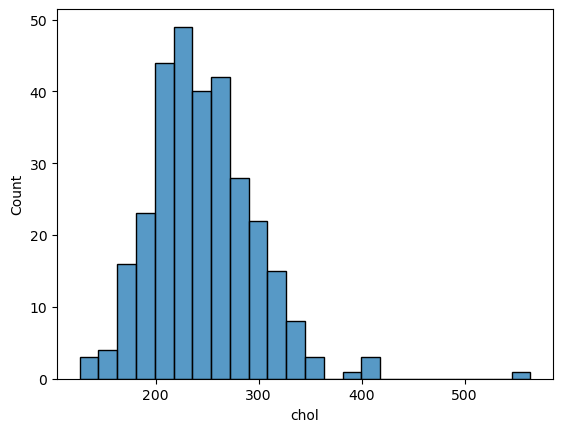

In [116]:
# Plot the distribution here:

sns.histplot(df.chol.dropna())

# Why is this a "histplot" and not a "distplot"?  
# According to the seaborn (sns) documentation, 
#  the "distplot" is a depricated function and will be removed in a future version.
# So let's explore other options in this learning space.

# Could also try to use sns.histplot(df.Chol.dropna())

In [ ]:
# Do you see any outliers?

<Axes: xlabel='Chol', ylabel='Count'>

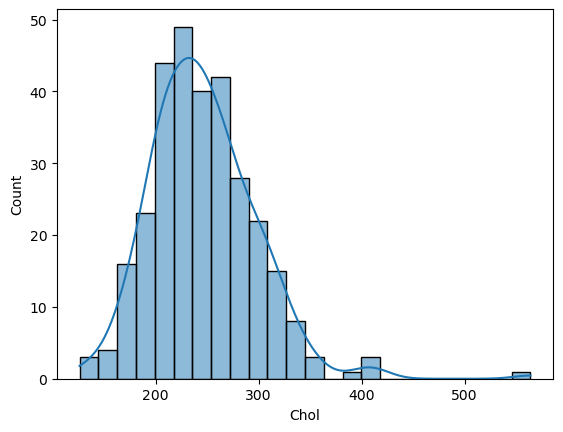

In [16]:
# Want the histogram with the standard deviation curve on the same plot? 

# Here is they syntax:
sns.histplot(data=df, x="Chol", kde=True)

[Documentation on the histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) to better understand the syntax.

**Part B:** Describe and Plot the Resting Heart Rate values

In [18]:
# code the describe() for RestBP
BP=df['RestBP']
BP.describe()


count    302.000000
mean     131.602649
std       17.563394
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestBP, dtype: float64

<Axes: xlabel='RestBP', ylabel='Count'>

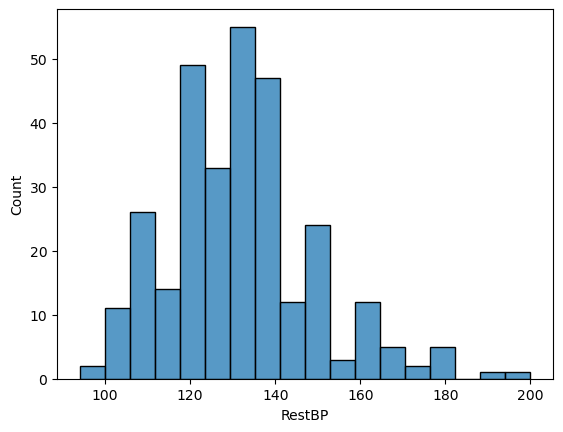

In [49]:
# Let's plot The resting heart rate, "RestBP".  
#You can choose to plot using "histplot" or "displot".  Your choice.
sns.histplot(df.RestBP.dropna())

In [ ]:
# Any outliers?

**Part C:** Describe and Plot the values you selected in Question 1 part c.

<Axes: xlabel='ChestPain', ylabel='Count'>

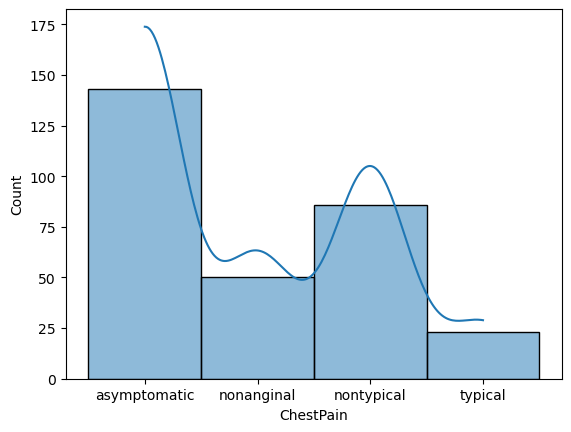

In [52]:
# Plot Part C here: 

sns.histplot(data=df, x="ChestPain", kde=True)

### Question 4: Find the mean of the RestBP and calculate the population proportion of the people who have the higher RestBP than the mean RestBP.

In [54]:
# Calculate the mean of the RestBp and print it

mean_bp=df.RestBP.dropna().mean()
mean_bp

131.60264900662253

In [55]:
# Question: Is the .dropna() siginificant or necessary for calculating the mean_rbp?
len(df)

302

In [66]:
# Calculate population proportion of people who have higher RestBP than the average


len(df[df['RestBP']>mean_bp])/len(df)

# 1. Translate this line of code in plain English?

# 2.  Break this line and examine your results.  What did you change?  What happened?


0.4337748344370861

### Question 5: Plot the Cholesterol data against the age group

0      (50, 60]
1      (50, 60]
2      (60, 70]
3      (60, 70]
4      (60, 70]
         ...   
723    (60, 70]
733    (40, 50]
739    (50, 60]
843    (50, 60]
878    (50, 60]
Name: agegrp, Length: 302, dtype: category
Categories (5, interval[int64, right]): [(29, 40] < (40, 50] < (50, 60] < (60, 70] < (70, 80]]


<Axes: xlabel='agegrp', ylabel='chol'>

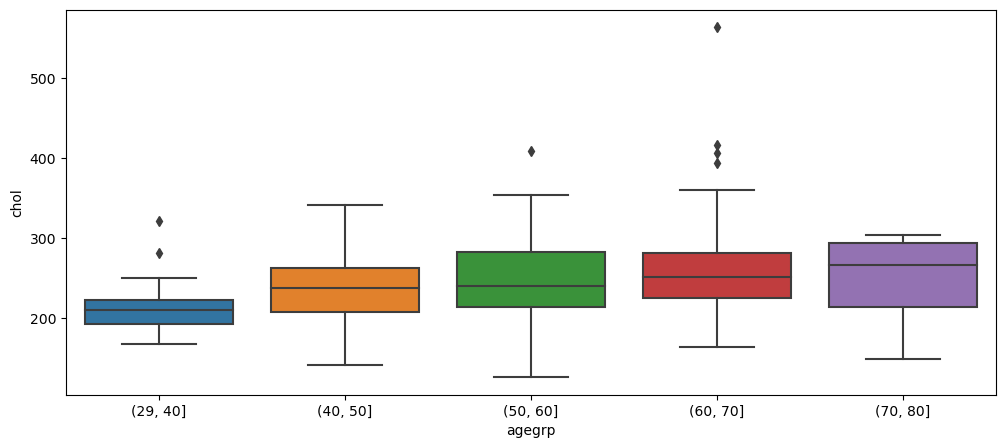

In [118]:
# df= pd.DataFrame({'number': np.random.randint(1, 100, 10)})
# df['bins']=pd.cut(x=df['number'],bins=[1,20,40,60,80,100])
# print(df)
# print(df['bins'].unique())
df["agegrp"]=pd.cut(df.age, [29,40,50,60,70,80])
print(df['agegrp'])
plt.figure(figsize=(12,5))
sns.boxplot(x = "agegrp", y = "chol", data=df)

In [ ]:
# Questions for you to answer:

# Looking at the code that was used to create the box plot, 
#   explain what the following code means in your own words:

# 1. pandas.cut():

# 2. Looking at the cut() method signature, what is a "bin": 

# 3. plt.figure():

# 3 A - in the code above, what do the numbers in figsize mean?  What happens if you change them?

# 4. sns.boxplot(x = ??, y = ??, data= ??):


<Axes: xlabel='agegrp', ylabel='chol'>

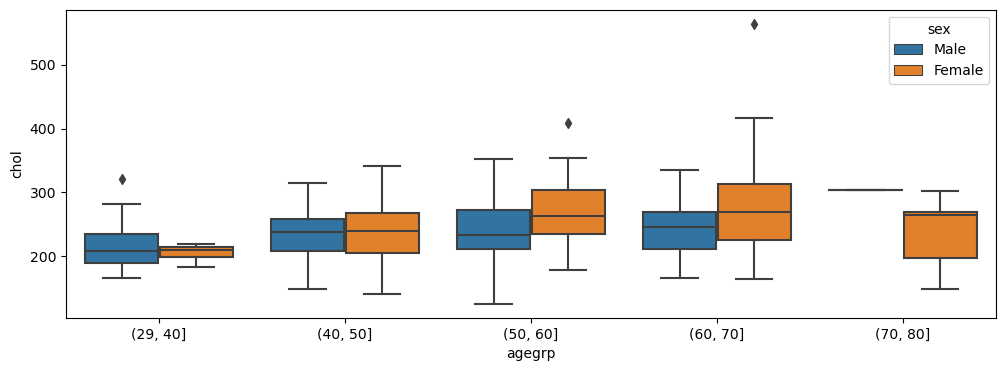

In [127]:
# Combine sex and cholesterol data here:




df["Sex1"] = df.sex.replace({1: "Male", 0: "Female"})
plt.figure(figsize=(12, 4))
# What does that line mean, in your own words:
sns.boxplot(x='agegrp',y='chol',hue='sex',data=df)

# There is a new argument in the boxplot function.  Look up what "hue" means.

<Axes: xlabel='Sex1', ylabel='age'>

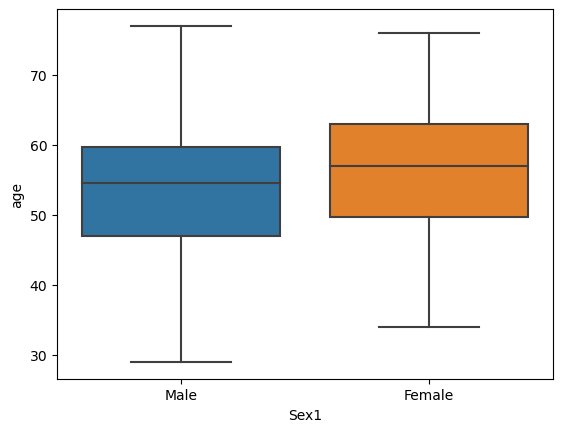

In [128]:
# How does the sns.boxplot(x = "Sex1", y = "Age", data=df) differ from the one in the cell above?
sns.boxplot(x='Sex1',y='age',data=df)

# What information does this provide you?

### Question 6:  Make a chart to show the number of people having each type of chest pain

In [119]:
df.groupby("agegrp")["cp"].value_counts().unstack()

cp,asymptomatic,nonanginal,nontypical,typical
agegrp,,,,
"(29, 40]",6.0,2.0,6.0,3.0
"(40, 50]",29.0,20.0,25.0,2.0
"(50, 60]",65.0,20.0,34.0,10.0
"(60, 70]",41.0,5.0,19.0,8.0
"(70, 80]",2.0,2.0,2.0,NaN


In [131]:
# Run the following line of code:

df.dropna().groupby("agegrp")["cp"].value_counts()

# Question:  
# 1. How does the output vary between these two lines?  

agegrp    cp          
(29, 40]  asymptomatic     6
          nontypical       6
          typical          3
          nonanginal       2
(40, 50]  asymptomatic    29
          nontypical      25
          nonanginal      20
          typical          2
(50, 60]  asymptomatic    65
          nontypical      34
          nonanginal      20
          typical         10
(60, 70]  asymptomatic    41
          nontypical      19
          typical          8
          nonanginal       5
(70, 80]  asymptomatic     2
          nonanginal       2
          nontypical       2
Name: cp, dtype: int64

### Question 7: Add on to your chart, but segregate by gender.

In [130]:
dx = df.dropna().groupby(["agegrp", "sex"])["cp"].value_counts().unstack()
print(dx)

cp               asymptomatic  nonanginal  nontypical  typical
agegrp   sex                                                  
(29, 40] Female           1.0         1.0         3.0      NaN
         Male             5.0         1.0         3.0      3.0
(40, 50] Female           6.0         8.0         8.0      NaN
         Male            23.0        12.0        17.0      2.0
(50, 60] Female          15.0         6.0        12.0      2.0
         Male            50.0        14.0        22.0      8.0
(60, 70] Female          16.0         1.0        10.0      2.0
         Male            25.0         4.0         9.0      6.0
(70, 80] Female           1.0         2.0         2.0      NaN
         Male             1.0         NaN         NaN      NaN


### Question 8:  Present population proportion for each type of chest pain

In [136]:
dx = dx.apply(lambda x: x/x.sum(), axis=1)
print(dx)

cp               asymptomatic  nonanginal  nontypical   typical
agegrp   sex                                                   
(29, 40] Female      0.122053    0.327076    0.550871       NaN
         Male        0.147413    0.079007    0.133066  0.640514
(40, 50] Female      0.151999    0.543100    0.304901       NaN
         Male        0.241554    0.337730    0.268606  0.152110
(50, 60] Female      0.235791    0.252748    0.283790  0.227671
         Male        0.280035    0.210122    0.185373  0.324470
(60, 70] Female      0.331896    0.055588    0.312078  0.300438
         Male        0.269659    0.115621    0.146049  0.468671
(70, 80] Female      0.106741    0.572086    0.321174       NaN
         Male        1.000000         NaN         NaN       NaN


Note on your output, as we made this notebook, we discovered that the ariticle dataset had been cleaned prior to our usage.  The methods used were not disclosed, so we cleaned ourselves.  Which could explain the discrepencies in this chart.

In [133]:
# Questions: In your own words:

# 1. What does the apply() function do?


# 2. What is lambda? 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 878
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       302 non-null    int64   
 1   sex       302 non-null    object  
 2   cp        302 non-null    object  
 3   trestbps  302 non-null    int64   
 4   chol      302 non-null    int64   
 5   fbs       302 non-null    int64   
 6   restecg   302 non-null    int64   
 7   thalach   302 non-null    int64   
 8   exang     302 non-null    int64   
 9   oldpeak   302 non-null    float64 
 10  slope     302 non-null    int64   
 11  ca        302 non-null    int64   
 12  thal      302 non-null    object  
 13  target    302 non-null    int64   
 14  agegrp    301 non-null    category
 15  Sex1      302 non-null    object  
dtypes: category(1), float64(1), int64(10), object(4)
memory usage: 46.4+ KB
